**<font size=3>https://reurl.cc/MvEZLm</font>**

# California Housing Project

本模組的加州房價案例，出自《[Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems](https://www.amazon.com/-/es/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=pd_sbs_14_t_0/140-5977253-2902144?_encoding=UTF8&pd_rd_i=1492032646&pd_rd_r=1d98b8ea-5d91-41f9-b798-ac3166e353b6&pd_rd_w=x9CVp&pd_rd_wg=VGJqg&pf_rd_p=5cfcfe89-300f-47d2-b1ad-a4e27203a02a&pf_rd_r=86MRTR00N2V5D7E7FEYT&psc=1&refRID=86MRTR00N2V5D7E7FEYT)》第二章。

原始資料，出自 1990 年代，美國加州政府的普查，後來出於教學目的，節錄過的資料被收入 [StatLib](http://lib.stat.cmu.edu/datasets/)。很多老師，為了配合自己的教學方便，又做了一些修改，Hands-On 這本書的作者 Aurélien Géron 曾經說明他的書裡面的資料改編自[Luis Torgo](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)的版本。

這個資料，目前在網路上有許多版本，除了作者提供的資料檔外，還可以自 [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices) 網站取得， scikit-learn 也提供 [fetch_californias_housing()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html?highlight=fetch_california#sklearn.datasets.fetch_california_housing) API 讓人線上下載，但是 scikit-learn 提供的資料欄位較少，而且將具有缺失值（missing values）的資料都拿掉了，**無法達成**我們要練習各種技巧的目的，所以我們使用 Hands-On 這本書作者供大家在網路上下載的版本。

補充：作者提供 source code & [jupyter notebook](https://github.com/killakalle/ageron_handson-ml)，非常 informative and helpful。

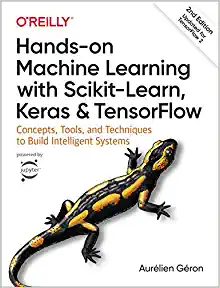

# 載入程式庫... ✔

In [4]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google Drive/adventures/'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'california/'
data_dir = groot_dir + 'california/'

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
        
def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0  
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]   
    return s

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier
    
def start_plot(figsize=(10, 8), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1,1)
    # plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax
    
print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage points to ==>', data_dir)

print('\nThis module is amied to leran regression basics...') 
print('\nLibraries and dependenciess imported')
print_now()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Running on linux
Python Version 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
Data storage points to ==> /content/drive/My Drive/adventures/california/

This module is amied to leran regression basics...

Libraries and dependenciess imported
2021-03-17 12:12:20.882345


In [ ]:
!pip3 install --upgrade yellowbrick pandas numpy statsmodels

     |████████████████████████████████| 276kB 5.5MB/s 
     |████████████████████████████████| 9.9MB 29.1MB/s 
     |████████████████████████████████| 15.3MB 295kB/s 
     |████████████████████████████████| 9.5MB 48.8MB/s 
ERROR: yellowbrick 1.3.post1 has requirement numpy<1.20,>=1.16.0, but you'll have numpy 1.20.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: jaxlib 0.1.60+cuda110 has requirement numpy<1.20,>=1.12, but you'll have numpy 1.20.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# fetch_california_housing

- [sklearn fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html?highlight=fetch_california#sklearn.datasets.fetch_california_housing)

In [5]:
from sklearn.datasets import fetch_california_housing

ca = fetch_california_housing()
X = pd.DataFrame(data=ca.data, 
                 columns=ca.feature_names)
y = ca.target

In [6]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

# Load housing data ✔

- [欄位說明](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

In [7]:
# complete version
fetch_file_via_requests(
    DropboxLink('otwy9uvj9kcns4t', 'housing.csv'), data_dir )

'/content/drive/My Drive/adventures/california/housing.csv'

In [8]:
df = pd.read_csv(os.path.join(data_dir, 'housing.csv'))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Inspect Data

- Pandas [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) Guide
- [A Guide to Pandas and Matplotlib for Data Exploration](https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c)
- Pands.DataFrame.[plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

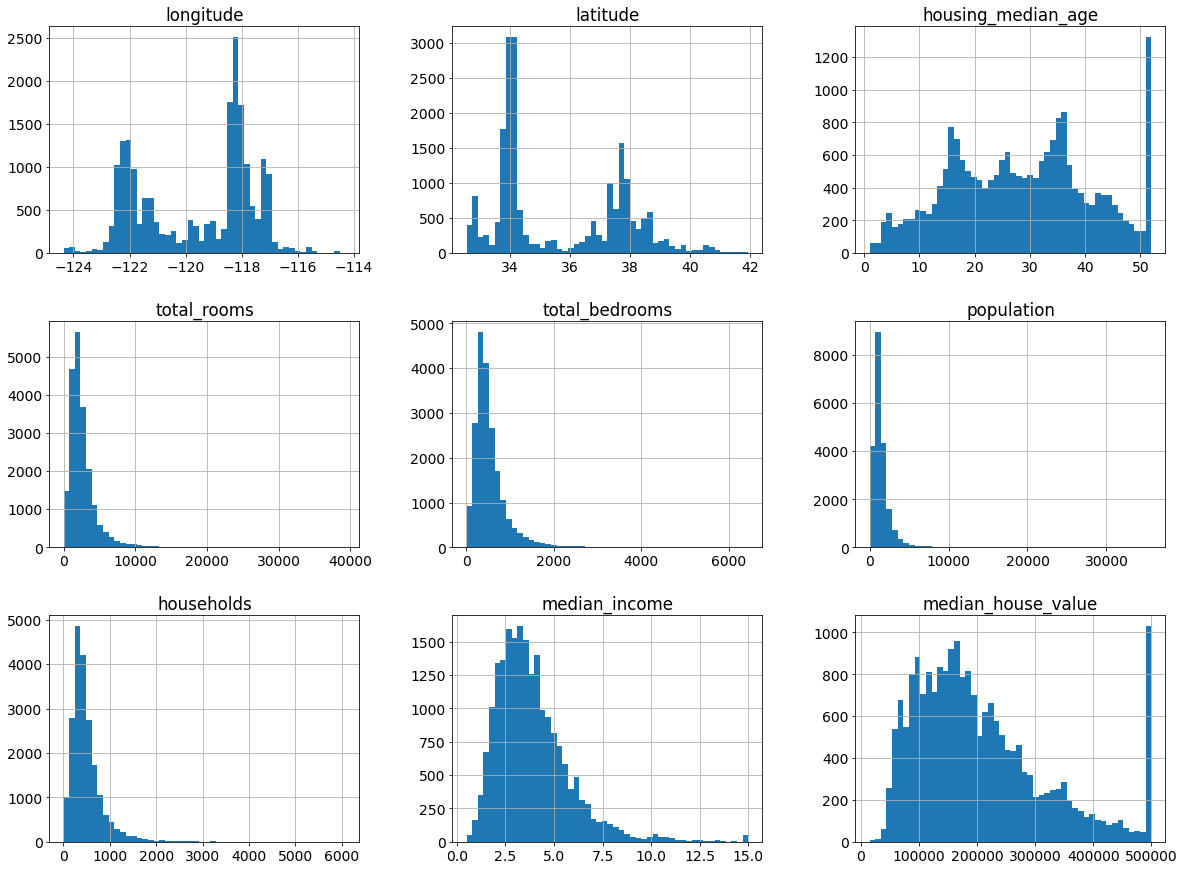

In [10]:
df.hist(bins = 50, figsize=(20,15))
plt.show()

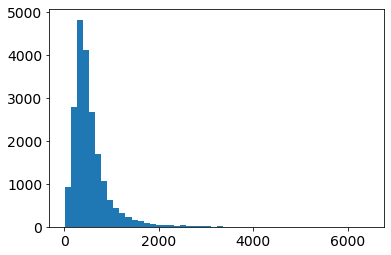

In [11]:
plt.hist(df['total_bedrooms'], bins = 50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


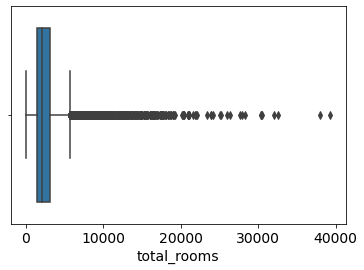

In [12]:
sns.boxplot(df['total_rooms'])

CPU times: user 19.1 s, sys: 212 ms, total: 19.3 s
Wall time: 19.3 s


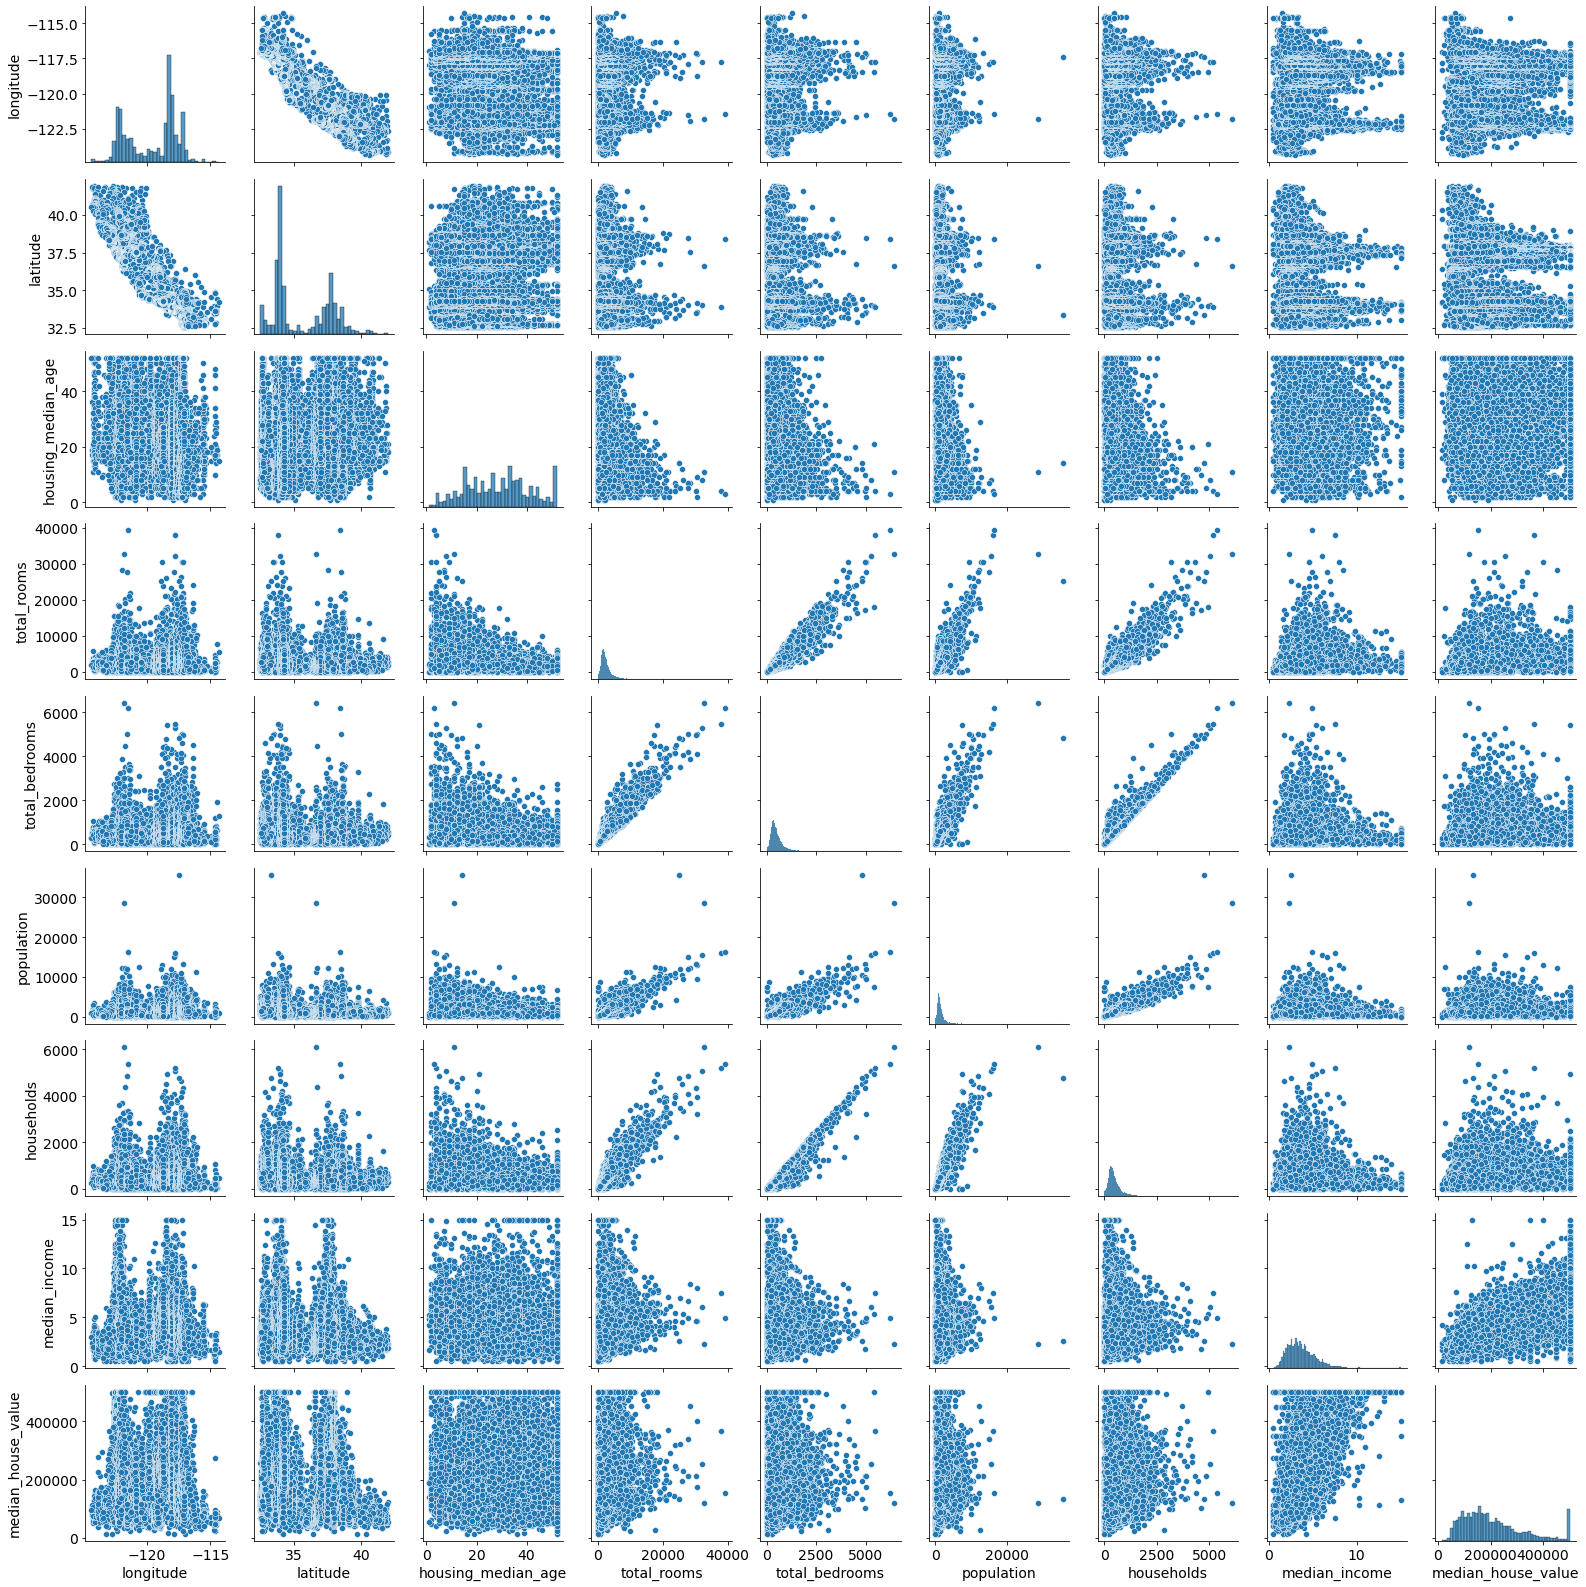

In [13]:
%%time
sns.pairplot(data=df)

In [14]:
corr=df.corr()
corr['median_house_value'].sort_values(ascending=False).index[1:]


Index(['median_income', 'total_rooms', 'housing_median_age', 'households',
       'total_bedrooms', 'population', 'longitude', 'latitude'],
      dtype='object')

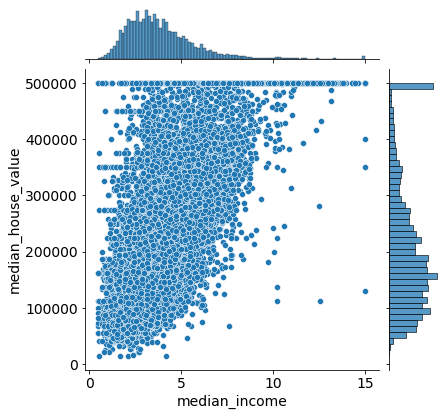

In [15]:
sns.jointplot(y='median_house_value', x = 'median_income', data = df)

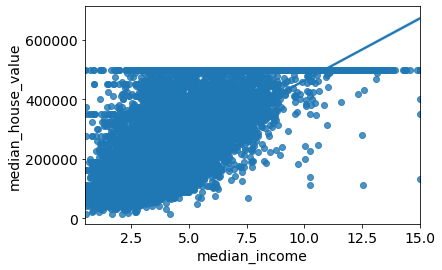

In [16]:
sns.regplot(y='median_house_value', x = 'median_income', data = df)

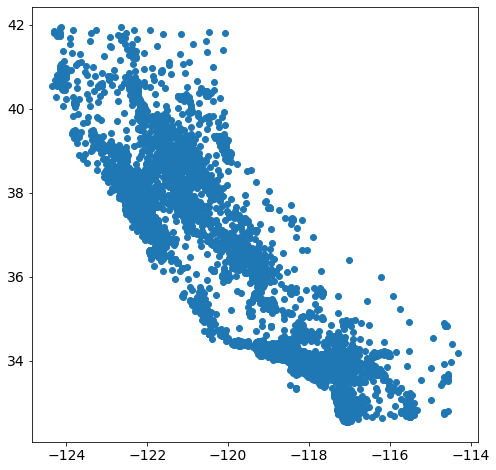

In [17]:
plt.figure(figsize=(8, 8))
plt.scatter(df.longitude, df.latitude)

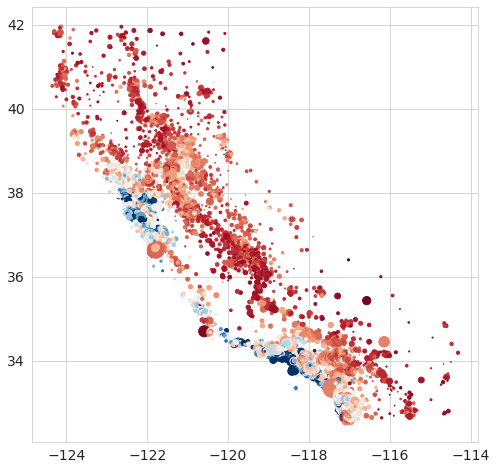

In [22]:
ax = start_plot(figsize=(8, 8))

ax.scatter(df.longitude, df.latitude,
    c = df['median_house_value'], cmap = 'RdBu',
    s = df.population/100)

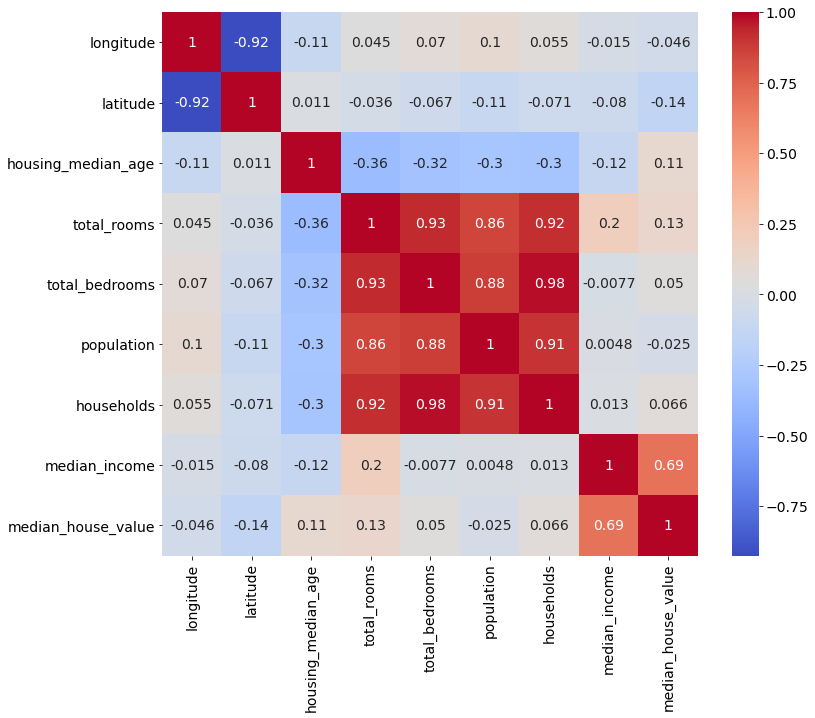

In [23]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
    annot = True, ax=ax, cmap = 'coolwarm')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


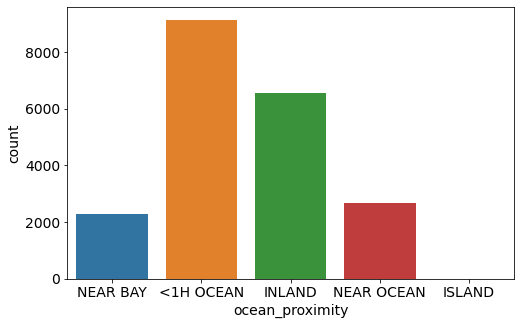

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x = 'ocean_proximity')

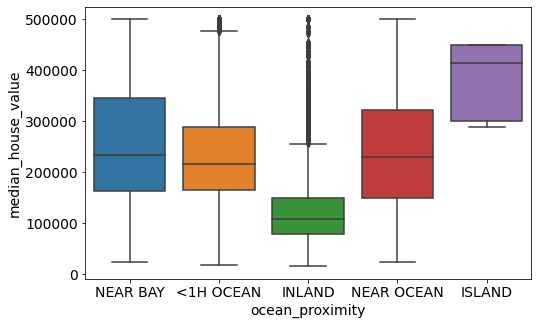

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x ='ocean_proximity', y = 'median_house_value' )

## 需不需要增加更多欄位

- rooms per household = total_rooms / households
- <s>bedrooms per room = total_bedrooms / total_rooms</s>
- population per household = population / households

In [ ]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]

df['income per working population'] = df['median_income']/(df['population']-df['household'])

df['population_per_household']=df["population"]/df["households"]

df['bed per house'] = df['total_bedrooms']/df['total_rooms']

df['h/p']=df['household']/df['population']



## 處理缺失值 Handling columns with na(NaN) values

- Pandas [isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
- Pandas.DataFrame.[any()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html?highlight=any#pandas.DataFrame.any)
- [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)
- [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna)
- [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna)
- [sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer) : Imputation transformer for completing missing values
- [6.4 Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html#impute)

In [27]:
df2 = df.copy()
nan_rows = df2[df2.isnull().any(axis=1)]

In [28]:
df2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [29]:
type(nan_rows)

pandas.core.frame.DataFrame

###  刪掉具缺失值的記錄

In [33]:
nan_rows.dropna(subset=['total_bedrooms'], )

# nan_new = nan_rows.dropna(subset=['total_bedrooms'])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [31]:
nan_new

NameError: ignored

### 把有缺失值的欄位整個捨棄

In [34]:
nan_rows.drop(['total_bedrooms'], axis = 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity


### 填入特定的數值

- [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna)

In [35]:
nan_rows = df2[df2.isnull().any(axis=1)]

In [36]:
median = df2['total_bedrooms'].median()
print(median)

435.0


In [37]:
nan_rows['total_bedrooms'].fillna(median, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [38]:
nan_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,435.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,435.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

 During **transform**, features corresponding to np.nan statistics will be discarded. 注意：fit 之前，若整個欄位都是 nan，這個欄位就會被全部捨棄

- [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html?highlight=knnimputer) New in 0.22

- [Scikit-learn Imputer Reducing Dimensions](https://stackoverflow.com/questions/38900132/scikit-learn-imputer-reducing-dimensions)

In [39]:
from sklearn.impute import SimpleImputer

df3 = df.filter(['total_bedrooms']).copy()
nans = df3[df3.isnull().any(axis=1)].index.tolist()


In [40]:
df3.iloc[nans]

,total_bedrooms
290,NaN
341,NaN
538,NaN
563,NaN
696,NaN
...,...
20267,NaN
20268,NaN
20372,NaN
20460,NaN


In [ ]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')
after = si.fit_transform(df3)

In [ ]:
sklearn.__version__

'0.22.2.post1'

In [ ]:
from sklearn.impute import KNNImputer
ki = KNNImputer(missing_values=np.nan, n_neighbors = 5)

kafter = ki.fit_transform(df3)

## 如何處理類別式（Categorical）欄位

In [ ]:
cats = df.select_dtypes(include=['object']).columns.tolist()
nums = df.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
nums

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
cats

['ocean_proximity']

### LabelEncoder

- [sklearn LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder#sklearn.preprocessing.LabelEncoder)

- [Encoding Categorical Features](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)

![alt text](https://miro.medium.com/max/578/1*VinegxkUYMzik9GpucWCFA.png)

In [ ]:
from sklearn.preprocessing import LabelEncoder

df2 = df[cats]

In [ ]:
le = LabelEncoder()

df2[cats] = \
    df2[cats].apply(lambda col: le.fit_transform(col))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df2

,ocean_proximity
0,3
1,3
2,3
3,3
4,3
...,...
20635,1
20636,1
20637,1
20638,1


### One Hot Encoder

- [OneHotEncoder().fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.fit_transform) : returns sparse matrix if sparse=True else a 2-d array

![alt text](https://i.imgur.com/mtimFxh.png)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df2 = df[cats]
enc = OneHotEncoder(handle_unknown='ignore')

a = enc.fit_transform(df2[cats]).toarray()


In [ ]:
df2.shape, a.shape

((20640, 1), (20640, 5))

### Pandas get_dummies

In [ ]:
df2 = df[cats]
df2 = pd.get_dummies(df2, drop_first=True)


# Prepare the data for ML tasks ✔

### Our Strategy

- 思考增加(或合併)欄位的理由和策略，並動手處理

- 以 ColumnTransfomrer 執行下列工作

```
for each attribute
    if attribute is numerical
        cells with NaN changed to mean()
        Standardize this attribure
    else if attribute is categorical
        one hot encoder

檢查每個欄位
    若欄位是數值型態
        缺失數值填入平均值
        將數字標準化
    若欄位是類別型態
        執行 One Hot Encoder
    其他型態
        bypass
```

### 開始動手！！！

In [ ]:
df = pd.read_csv(os.path.join(data_dir, 'housing.csv'))

In [ ]:
def type_building(x):
    if x < 10:
        return 'new'
    elif x <= 25:
        return 'mid old'
    else:
        return 'old'

df['housing_median_age'] = \
    df['housing_median_age'].apply(type_building)
    
df['population_per_household']=df["population"]/df["households"]

# df['bed per house'] = df['total_bedrooms']/df['total_rooms']

df['h/p']=df['households']/df['population']

In [ ]:
X_raw = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

cat_features = \
    X_raw.select_dtypes(include=['object']).columns.tolist()
num_features = \
    X_raw.select_dtypes(include=[np.number]).columns.tolist()

### ColumnTransformer

- [sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer) : Imputation transformer for completing missing values

-------
 - [TransformerMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html)
 - [BaseEstimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html?highlight=baseestimator#sklearn.base.BaseEstimator)
 - [End-to-end Machine Learning project on predicting housing prices using Regression](https://medium.com/@gurupratap.matharu/end-to-end-machine-learning-project-on-predicting-housing-prices-using-regression-7ab7832840ab)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #
        # 在這裏加入「增加欄位」的程式碼：你自己撰寫的 Transformer Class
        #
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", OneHotEncoder(), cat_features)
    ])



In [ ]:
from sklearn.model_selection import train_test_split
X_prepared = full_pipeline.fit_transform(X_raw)
train_x, test_x, train_y, test_y = \
    train_test_split(X_prepared, y, test_size = 0.2)

In [ ]:
X_prepared.shape, train_x.shape

((20640, 17), (16512, 17))

## pickle utilities

In [ ]:
import pickle

prepared_file = os.path.join(data_dir, 'prepared.pkl')

pickle.dump( (df, X_prepared, y), open( prepared_file, "wb" ) )


In [ ]:
import pickle

prepared_file = os.path.join(data_dir, 'prepared.pkl')

(df_pickle, X_pickle, y_pickle) = \
    pickle.load( open( prepared_file, "rb" ) )

(20640, 17)

# Training & Testing

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Linear Regression

[83596.43833719 57834.82025167 83418.698019   59254.43929916
 74804.68044135 70509.30083271 50886.43653016 88697.84589396
 77803.59157491 54930.66735811]
70173.69185382288 12862.132386494437


Text(0.5, 1.0, 'RMSE: 70173.692 +/- 12862.1324')

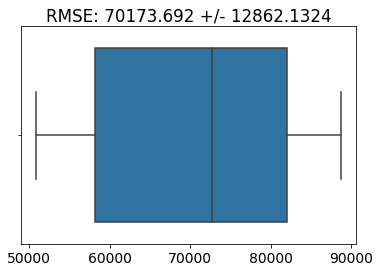

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X_prepared, y, 
    scoring = 'neg_mean_squared_error',
    cv = 10)

scores = np.sqrt(-scores)

print(scores)
print(scores.mean(), scores.std())

ax = sns.boxplot(scores)
ax.set_title('RMSE: %.3f +/- %.4f' % (scores.mean(), scores.std()))


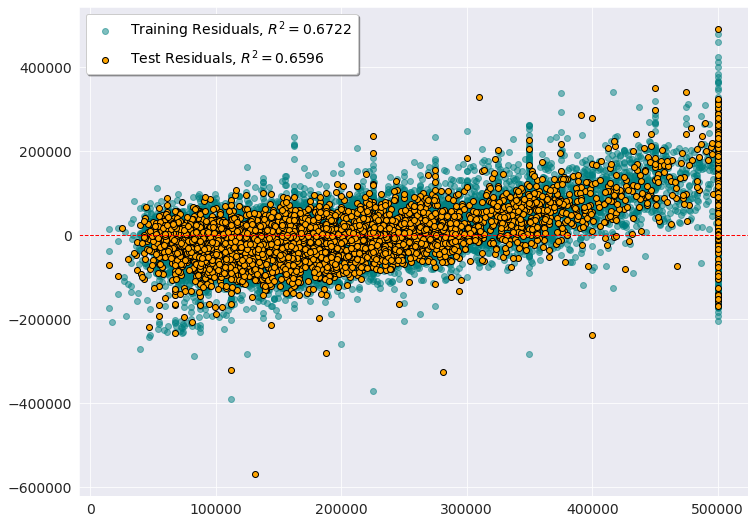

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
y_pred_train =  model.predict(train_x)
y_pred_test = y_pred
y_true_train = train_y
y_true_test = test_y
residuals_train = train_y - y_pred_train
residuals_test = test_y - y_pred_test
r2_train = r2_score(y_true_train, y_pred_train)
r2_test = r2_score(y_true_test, y_pred_test)

ax=start_plot(figsize=(12, 9), style='darkgrid')

r2_train = r2_score(y_true_train, y_pred_train)
r2_test = r2_score(y_true_test, y_pred_test)

ax.scatter(train_y, residuals_train, color = 'teal', alpha = 0.5,
           label = 'Training Residuals, ' + 
           r'$R^2=%.4f$' % r2_train)
ax.scatter(test_y, residuals_test, color =  'orange', edgecolor='k',
           label = 'Test Residuals, ' + 
            r'$R^2=%.4f$' % r2_test)
ax.axhline(y = 0, c = 'red', ls = '--', lw = 1)
ax.legend(frameon=True, shadow=True, fontsize = 14)   

## Lasso/Ridge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5543777653159.977, tolerance: 25452861826.32828
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1396967547198.3203, tolerance: 24379018401.29058
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7471301379667.492, tolerance: 24114537954.496296
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7894937539

[83587.84618094 57834.40106775 83419.54174076 59254.26601331
 74808.85356981 70508.6387862  50885.20345255 88699.02632933
 77804.45019975 54928.81039779]
70173.10377381889 12862.152344102149


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6466320340955.117, tolerance: 25315368222.184708
  positive)


Text(0.5, 1.0, 'RMSE: 70173.104 +/- 12862.1523')

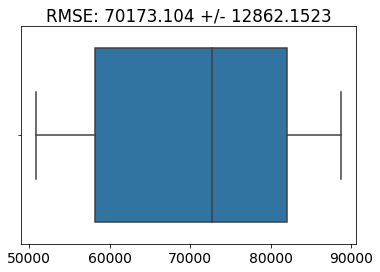

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

model = Lasso()

scores = cross_val_score(model, X_prepared, y, 
    scoring = 'neg_mean_squared_error',
    cv = 10)

scores = np.sqrt(-scores)

print(scores)
print(scores.mean(), scores.std())

ax = sns.boxplot(scores)
ax.set_title('RMSE: %.3f +/- %.4f' % (scores.mean(), scores.std()))


## RandomForest

[99642.71382969 50671.8595998  69042.72472894 60704.61210066
 64184.68325789 63958.85290429 49414.54614915 86653.3130752
 76372.45079946 51189.86528698]
67183.56217320586 15575.947152977325


Text(0.5, 1.0, 'RMSE: 67183.562 +/- 15575.9472')

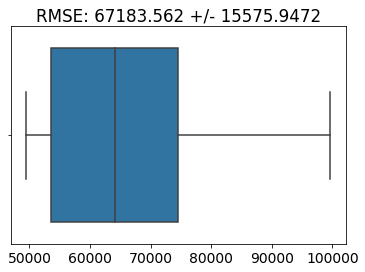

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators = 10)

scores = cross_val_score(model, X_prepared, y, 
    scoring = 'neg_mean_squared_error',
    cv = 10)

scores = np.sqrt(-scores)

print(scores)
print(scores.mean(), scores.std())

ax = sns.boxplot(scores)
ax.set_title('RMSE: %.3f +/- %.4f' % (scores.mean(), scores.std()))


# Comparison of Models

In [ ]:
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

[11:10:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

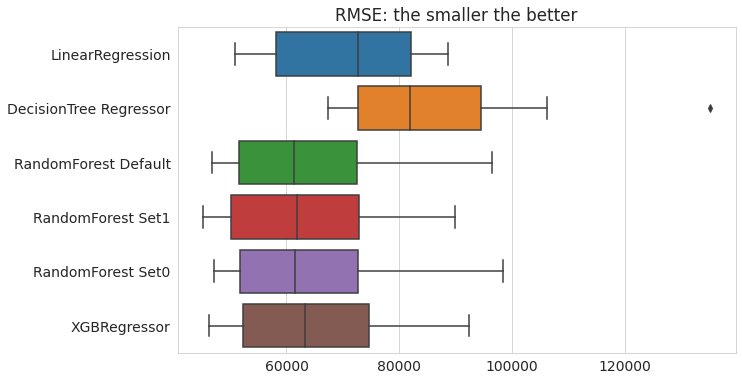

In [ ]:
%%time

model_names = ['LinearRegression', 
    'DecisionTree Regressor', 
    'RandomForest Default',
    'RandomForest Set1',
    'RandomForest Set0',
    'XGBRegressor']
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    # RandomForestRegressor(
    #     max_depth = 20, max_features= 'sqrt',
    #     min_samples_leaf = 1, min_samples_split =10, 
    #     n_estimators = 70  
    # ),
    RandomForestRegressor( max_features= 6, 
        n_estimators =40),    
    RandomForestRegressor(bootstrap=True, 
        criterion='mse', max_features='auto', 
        min_samples_leaf = 1,
        n_estimators = 200),
    XGBRegressor()
]

model_comp = pd.DataFrame()

for name, model in zip(model_names, models):
    scores = cross_val_score(model, X_prepared, y, 
        scoring='neg_mean_squared_error',
        cv = 10)
    model_comp[name] = np.sqrt(-scores)

ax = start_plot(figsize=(10, 6))

sns.boxplot(data = model_comp, orient = 'h')
ax.set_title('RMSE: the smaller the better')
output_fig('Model 比較 - final')


# GridSearchCV

- how to use [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html?highlight=cross_validate#sklearn.model_selection.cross_validate)
- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV)
- Pandas.[cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?highlight=cut#pandas.cut)
- [sklearn.model_selection.StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) :  This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.
- [split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit.split) method: Generate indices to split data into training and test set.

In [ ]:
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest#sklearn.ensemble.RandomForestRegressor)

In [ ]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_params=[{
    'n_estimators':[20,30,70,50, 60, 100, 200, 500],
    'max_depth':[10,20,30, 70, 100],
    'min_samples_split':[2,3,4,5,10],
    'min_samples_leaf' :[1,2,5,7,10],
    'bootstrap':[True,False],
    'max_features':['sqrt','auto']          
}]

param_grid = [
    {
    'n_estimators': [3, 10, 30, 40, 50, 60, 100, 200], }
    # 'max_features': [2, 4, 6, 8, 10]},
]

grid_search = GridSearchCV( RandomForestRegressor(),
    param_grid, cv = 10,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True)

grid_search.fit(X_preapred, y)

print(grid_search.best_param_)


```
{'max_features': 6, 'n_estimators': 30}
```

```
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 70}
```

[89402.0344672  45040.79782277 66314.4327377  58896.63135297
 61904.62502951 60313.14935195 47407.1745157  80693.47347039
 74871.99889817 47601.65137816]
63244.596902451805 14104.938531979758
CPU times: user 28.5 s, sys: 50.7 ms, total: 28.5 s
Wall time: 28.6 s


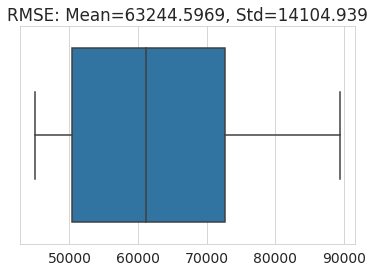

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model2 = RandomForestRegressor(
    bootstrap = False, max_depth = 20, 
    max_features= 'sqrt', 
    min_samples_leaf = 1, min_samples_split =10, 
    n_estimators = 70  
)
model1 = RandomForestRegressor( max_features= 6, 
    n_estimators = 40)

model3 = RandomForestRegressor()

scores = cross_val_score(model1, X_prepared, y, 
    scoring = 'neg_mean_squared_error', cv = 10)

scores = np.sqrt(-scores)
print(scores)
print(scores.mean(), scores.std())
ax = start_plot(figsize=(6, 4))
sns.boxplot(scores, ax=ax)
ax.set_title('RMSE: Mean=%.4f, Std=%.3f' % \
    (scores.mean(), scores.std()) )
output_fig('best - none')

# Cook's Distance

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def CooksDistance(X, y):
    Xadd = sm.add_constant(X)
    m = sm.OLS(y, X).fit()
    infl = m.get_influence()
    rdf = infl.summary_frame()
    return rdf['cooks_d']

def PlotCooksDistance(X, y, figsize = (10,5), style = 'whitegrid', color = 'navy'):
    cooks = CooksDistance(X, y)
    ax = start_plot(figsize=figsize, style=style)

    ax.vlines(range(len(cooks)), cooks, 0, color = color)
    ax.set_xlabel('instance index')
    ax.set_ylabel('influence(i)')
    hpos = 3*cooks.mean()
    ax.axhline(y = hpos, color = 'brown', ls = '--', lw = 1)


ratio > [3 * mean] = 0.01



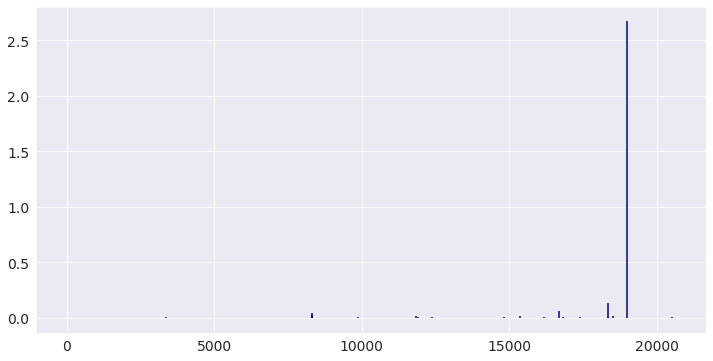

In [ ]:
import pickle

ckfile = os.path.join(os.path.join(data_dir), 'distance.pkl')

ck = pickle.load(open(ckfile, 'rb'))

mu3 = 3 * ck.mean()
how_many = len(ck[ck>mu3].index)/len(X_prepared)

print('ratio > [3 * mean] = %.2f\n' % how_many)

ax = start_plot(figsize=(12, 6), style='darkgrid')
ax.vlines(range(len(ck)), ck, 0, color = 'navy')


# PCA

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline

def PCA_analysis(estimater, n_features, X_train, y_train, 
    X_test = None, y_test = None):

    N = n_features

    scores_train = np.zeros(N)
    scores_test = np.zeros(N)

    for i in np.arange(N, 2, -1):
        model = make_pipeline(
            PCA(n_components = i),
            estimater
        )
        model.fit(X_train, y_train)
        scores_train[i-1] = model.score(X_train, y_train)
        if X_test is not None:
            scores_test[i-1] = model.score(X_test, y_test)

    xdomain = np.arange(2, N, 1)

    ax = start_plot(figsize=(10,7))
    ax.plot(xdomain, scores_train[2:], label = 'Training Scores')
    if X_test is not None:
        ax.plot(xdomain, scores_test[2:], color = 'brown',
            label = 'Test Scores')
    ax.legend(loc='lower center', frameon=True,shadow=True,fancybox=True,fontsize=14)


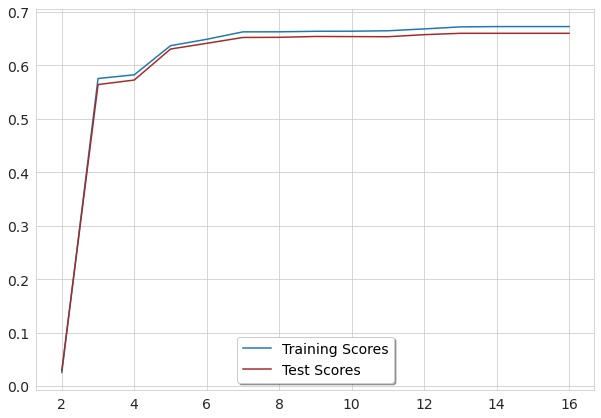

In [ ]:
PCA_analysis( LinearRegression(), X_prepared.shape[1], 
        train_x, train_y, test_x, test_y)


# End of File